<a href="https://colab.research.google.com/github/Ivanrs297/generative-deep-learning-course/blob/main/pytorch_conv_ae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# Dataloader - CIFAR10

In [2]:
batch_size = 32

train_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10("data", train = True, download = True,
                     transform = transforms.ToTensor()),
    batch_size = batch_size, shuffle = True
)

Files already downloaded and verified


In [3]:
test_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10("data", train = False, download = True,
                     transform = transforms.ToTensor()),
    batch_size = 1
)

Files already downloaded and verified


# Model

In [16]:
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()

    # solution: padding to 2 -> Xander
    self.encoder = nn.Sequential(
        nn.Conv2d(3, 16, kernel_size = 2, stride = 2, padding = 2),
        nn.Conv2d(16, 8, kernel_size = 2, stride = 2, padding = 2),
    )

    self.decoder = nn.Sequential(
        nn.ConvTranspose2d(8, 16, kernel_size = 2, stride = 2, padding = 2),
        nn.ConvTranspose2d(16, 3, kernel_size = 2, stride = 2, padding = 2),
    )

  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x

In [17]:
model = Autoencoder()
model.cuda()

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 16, kernel_size=(2, 2), stride=(2, 2), padding=(2, 2))
    (1): Conv2d(16, 8, kernel_size=(2, 2), stride=(2, 2), padding=(2, 2))
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(8, 16, kernel_size=(2, 2), stride=(2, 2), padding=(2, 2))
    (1): ConvTranspose2d(16, 3, kernel_size=(2, 2), stride=(2, 2), padding=(2, 2))
  )
)

# Show images with Dataloader

In [18]:
batch_data = next(iter(train_loader))
batch_data[0].shape

torch.Size([32, 3, 32, 32])

In [19]:
img = batch_data[0][10]
print(img.shape)

torch.Size([3, 32, 32])


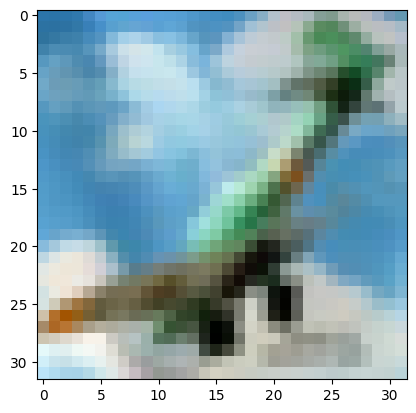

In [20]:
img = transforms.ToPILImage()(img)
img = np.array(img)
plt.imshow(img)

# Training

In [21]:
model.to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
n_epochs = 10

for epoch in range(n_epochs):

  for images, labels in train_loader:
    images = images.cuda()
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, images)
    loss.backward()
    optimizer.step()

  print("Epoch: ", epoch)

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
